# Computational Social Science Project #3 

**Enter your Name:**____________

*Semester:* Fall 2023

## 1. Introduction

### Load data 

In [95]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [96]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [97]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [98]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [99]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [100]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

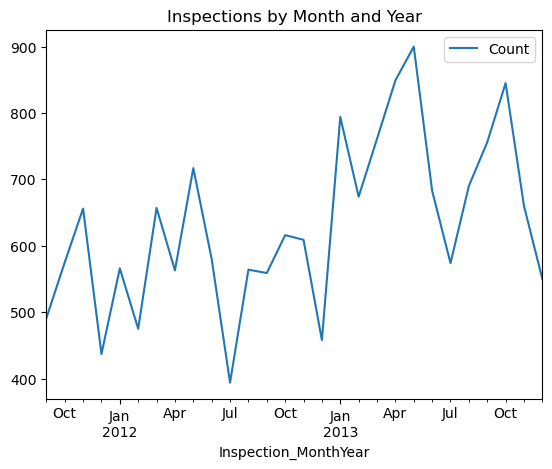

In [101]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

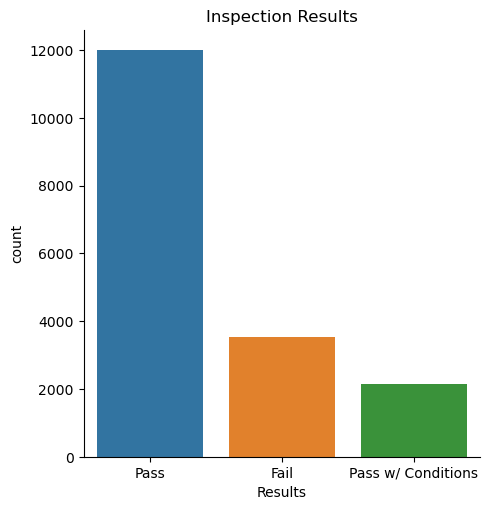

In [102]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

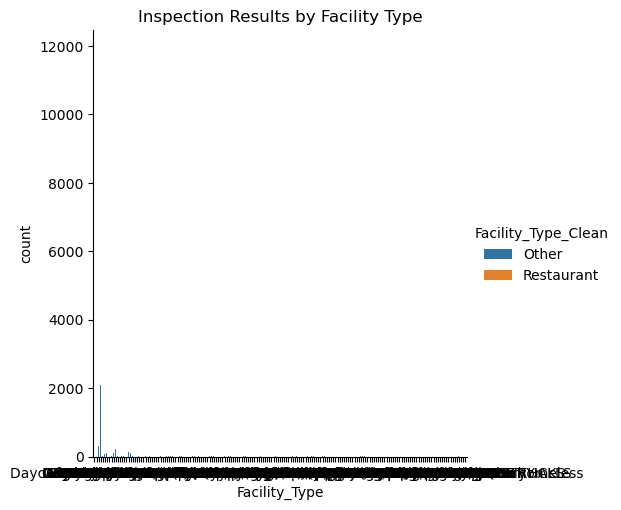

In [103]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Facility_Type",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [129]:

chicago_inspections_2011_to_2013.describe()
print(chicago_inspections_2011_to_2013.columns)
print(chicago_inspections_2011_to_2013.dtypes)
print(chicago_inspections_2011_to_2013.shape)
#sns.catplot(chicago_inspections_2011_to_2013, x = "pastSerious", kind = "count")

Index(['Risk', 'Results', 'Facility_Type_Clean', 'criticalCount',
       'seriousCount', 'minorCount', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound'],
      dtype='object')
Risk                                            object
Results                                         object
Facility_Type_Clean                             object
criticalCount                                  float64
seriousCount                                   float64
minorCount                 

In [107]:
#check m issing value
missing_values = chicago_inspections_2011_to_2013.isnull().sum()

# Display the result
print(missing_values)

Inspection_Date                                   0
Facility_Type                                    24
Risk                                              0
Inspection_Type                                   0
Results                                           0
Facility_Type_Clean                               0
criticalCount                                     0
seriousCount                                      0
minorCount                                        0
pastFail                                          0
pastCritical                                      0
pastSerious                                       0
pastMinor                                         0
timeSinceLast                                     0
firstRecord                                       0
WARD_PRECINCT                                  1944
POLICE_DISTRICT                                2349
LICENSE_DESCRIPTION                            1913
APPLICATION_TYPE                               1913
minDate     

In [108]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'Inspection_Type',
                                                                                   'Inspection_MonthYear',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Facility_Type',
                                                                                   'WARD_PRECINCT',
                                                                                   'POLICE_DISTRICT',
                                                                                   'LICENSE_DESCRIPTION',
                                                                                   'APPLICATION_TYPE',
                                                                                   'ageAtInspection'],
                                                                                   axis = 1)

In [182]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------
# Select columns to transform
columns_to_standardize = ['criticalCount', 'seriousCount', 'minorCount', 'pastFail', 'pastCritical', 'pastSerious', 'pastMinor',
                          'precipIntensity', 'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary', 'heat_garbage', 'heat_sanitation', 'timeSinceLast']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
chicago_inspections_2011_to_2013[columns_to_standardize] = scaler.fit_transform(chicago_inspections_2011_to_2013[columns_to_standardize])

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])


# get dummies
X = pd.get_dummies(X)

In [187]:
# view feature datset
X.head()

Inspection_ID  criticalCount  seriousCount  minorCount  pastFail  \
1         920445       2.977854     -0.546200   -1.829965 -0.413978   
2         920446      -0.392995     -0.546200    1.155973 -0.413978   
3         920448      -0.392995      0.975661    1.653630 -0.413978   
4         920449       1.292430      2.497521    0.658317 -0.413978   
5         920450      -0.392995      0.975661    1.653630 -0.413978   

   pastCritical  pastSerious  pastMinor  timeSinceLast  firstRecord  \
1     -0.333556    -0.458914  -1.356606      -0.539573            0   
2     -0.333556    -0.458914  -0.468519      -0.793491            0   
3     -0.333556    -0.458914  -1.356606       1.740502            1   
4     -0.333556    -0.458914  -1.356606       1.740502            1   
5     -0.333556    -0.458914  -0.024475      -0.218290            0   

   consumption_on_premises_incidental_activity  tobacco  package_goods  \
1                                            0        0              0   
2                                            0        0              0   
3                                            0        1              0   
4                                            0        1              0   
5                                            0        0              0   

   outdoor_patio  public_place_of_amusement  limited_business_license  \
1              0                          0                         0   
2              0                          0                         0   
3              0                          0                         0   
4              0                          0                         1   
5              0                          0                         0   

   childrens_services_facility_license  tavern  regulated_business_license  \
1                                    0       0                           0   
2                                    0       0                           0   
3                                    0       0                           0   
4                                    0       0                           0   
5                                    0       0                           0   

   filling_station  caterers_liquor_license  mobile_food_license  \
1                0                        0                    0   
2                0                        0                    0   
3                1                        0                    0   
4                0                        0                    0   
5                0                        0                    0   

   precipIntensity  temperatureMax  windSpeed  humidity  heat_burglary  \
1        -0.046664       -0.936527  -0.960570  0.864236      -0.599431   
2        -0.046664       -0.936527  -0.960570  0.864236       0.264343   
3        -0.327358       -1.078509  -0.473404 -0.489542       1.668409   
4        -0.327358       -1.078509  -0.473404 -0.489542       2.908580   
5        -0.327358       -1.078509  -0.473404 -0.489542       2.891752   

   heat_garbage  heat_sanitation  criticalFound  DBA_Name_#1 CHOP SUEY  \
1     -0.546794        -0.717105              1                      0   
2      0.842092        -0.425841              0                      0   
3     -0.271748         0.982407              0                      0   
4      0.765282         1.252256              1                      0   
5      0.828702         1.287382              0                      0   

   DBA_Name_1,200 SQ.FT. - YEMEN RESTAURANT, INC.  \
1                                               0   
2                                               0   
3                                               0   
4                                               0   
5                                               0   

   DBA_Name_10 PIN  BOWLING LOUNGE  DBA_Name_123 GROCERY PLUS  \
1                                0                          0   
2                                0              

## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

### Model 1: Logistic Regression

In [111]:
# import libraries 
import time
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

# record the start time
start_time = time.time()

# set training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""
# fit scaler on the training data and transform both the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# assuming y_train and y_test are column vectors, reshape them to 1D arrays
y_train = y_train.ravel()
y_test = y_test.ravel()
"""
# create a logistic regression model
model = LogisticRegression(max_iter=1000)

# define hyperparameter grid
param_grid = {
    'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5],  # regularization parameter
    'penalty': ['l1','l2'],  # type of loss functions
    'fit_intercept': [True, False],
    'solver': ['liblinear', 'sag', 'saga']  # optimization algorithm
}

# perform grid search with cross-validation
grid_search = GridSearchCV(model, 
                           param_grid, 
                           cv=5, 
                           scoring='recall') #I intentionally choose 'recall' because we want to detect the fail as much as possible 
grid_search.fit(X_train, y_train)

# get the best parameters
best_params = grid_search.best_params_

# use best parameters to train the final model
final_model_log = LogisticRegression(max_iter=1000, **best_params)
final_model_log.fit(X_train, y_train)

# make predictions on the test set
y_pred = final_model_log.predict(X_test)

# evaluate the final model
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

# record the end time/run time
end_time = time.time()
runtime = end_time - start_time

# print scoring metrics
print(f"Best Hyperparameters: {best_params}")
print(f"\nAccuracy: {accuracy} \nRecall: {recall} \nPrecision: {precision} \nF1 Score: {f1}")
print(f"\nRuntime: {runtime} seconds")

Best Hyperparameters: {'C': 0.001, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}

Accuracy: 0.9262161279791055 
Recall: 0.9490445859872612 
Precision: 0.7544303797468355 
F1 Score: 0.840620592383639

Runtime: 209.91171717643738 seconds


C:\Users\jeng_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jeng_\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jeng_\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jeng_\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = 

###  Model 2: Adaptive Boosting

In [112]:
# import libraries for Adaptive Boosting
import time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier  # Import the base estimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score

# record the start time
start_time = time.time()

# set training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize an adaboost classifier with estimator
estimator = DecisionTreeClassifier(max_depth=1)  # You can adjust the hyperparameters of the base estimator
ada_classifier = AdaBoostClassifier(estimator=estimator)

# define a hyperparameter grid
param_grid = {
    'n_estimators': [20, 50, 100, 150],
    'learning_rate': [0.001, 0.01, 0.1, 1],
}

# perform grid search with cross-validation
grid_search = GridSearchCV(ada_classifier, 
                           param_grid, 
                           cv=5, 
                           scoring='recall') #I intentionally choose 'recall' because we want to detect the fail as much as possible
grid_search.fit(X_train, y_train)

# get the best parameters
best_params = grid_search.best_params_

# use the best parameters to train the final model
final_model_adb = AdaBoostClassifier(estimator=estimator, **best_params)
final_model_adb.fit(X_train, y_train)

# make predictions on the test set
y_pred = final_model_adb.predict(X_test)

# evaluate the final model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# record the end time/run time
end_time = time.time()
runtime = end_time - start_time

# print the best hyperparameters and metrics
print(f"Best Hyperparameters: {best_params}")
print(f"\nAccuracy: {accuracy} \nRecall: {recall} \nPrecision: {precision} \nF1 Score: {f1}")
print(f"\nRuntime: {runtime} seconds")

Best Hyperparameters: {'learning_rate': 0.001, 'n_estimators': 20}

Accuracy: 0.9262161279791055 
Recall: 0.9490445859872612 
Precision: 0.7544303797468355 
F1 Score: 0.840620592383639

Runtime: 134.39291214942932 seconds


### Model 3: XGBoost

In [128]:
# import libraries for xgboost
#!pip install xgboost
import time
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score

# record the start time
start_time = time.time()

# initialize an xgb classifier
xgb_classifier = xgb.XGBClassifier(random_state=10)

# define a hyperparameter grid
param_grid = {
    'n_estimators': [20, 50, 100, 150],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# define the scoring metrics
scoring = {
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1 Score': make_scorer(f1_score)
}

# perform grid search with cross validation
grid_search = GridSearchCV(xgb_classifier,
                           param_grid,
                           cv=5,
                           scoring='recall') #I intentionally choose 'recall' because we want to detect the fail as much as possible
grid_search.fit(X_train, y_train)

# get the best parameters
best_params = grid_search.best_params_

# use the best parameters to train the final model
final_model_xgb = xgb.XGBClassifier(random_state=10, **best_params)
final_model_xgb.fit(X_train, y_train)

# make predictions on the test set
y_pred = final_model_xgb.predict(X_test)

# evaluate the final model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# print the best hyperparameters and metrics
print(f"Best Hyperparameters: {best_params}")
print(f"\nAccuracy: {accuracy} \nRecall: {recall} \nPrecision: {precision} \nF1 Score: {f1}")
print(f"\nRuntime: {runtime} seconds")

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 20, 'subsample': 0.9}

Accuracy: 0.9294809010773751 
Recall: 0.928343949044586 
Precision: 0.773209549071618 
F1 Score: 0.8437047756874095

Runtime: 301.3220443725586 seconds


### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

In [127]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold

# Assume you have a list of models
models_list = [final_model_log, final_model_adb, final_model_xgb]  # Replace with your actual models

# Define the metrics you want to evaluate
metrics = ['accuracy', 'precision', 'recall', 'f1']

# Create a dictionary to store the results
results = {metric: [] for metric in metrics}

# Set up cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Adjust the number of splits as needed

# Iterate through each model
for model in models_list:
    # Iterate through each metric
    for metric in metrics:
        # Create a scorer for the current metric
        if metric == 'accuracy':
            scorer = make_scorer(accuracy_score)
        elif metric == 'precision':
            scorer = make_scorer(precision_score)
        elif metric == 'recall':
            scorer = make_scorer(recall_score)
        elif metric == 'f1':
            scorer = make_scorer(f1_score)
        
        # Use cross_val_score to calculate the metric scores
        scores = cross_val_score(model, X, y, cv=cv, scoring=scorer)
        
        # Append the mean score to the results dictionary
        results[metric].append(scores.mean())

# Convert the results dictionary to a DataFrame for easy inspection
import pandas as pd
results_df = pd.DataFrame(results)
answer = """"In the purpose of identify the resturants that have a tendency to fail the food inspection, we should prioritize the recall score
because we want to detect the resturants that fail the inspection as many as possible - minimizing the chance of false negative.
So the recall that measures how many true postive that model can detect is suitable for this context.
The precision that focus on the the precision of predicted positive would not suitable
because this measure encurages the model to reduce the number of predicted positive (predict that the resturant fails the inspection),
so it increases false negative, which we do not want in the case."""
print(answer)
print(results_df)



"In the purpose of identify the resturants that have a tendency to fail the food inspection, we should prioritize the recall score
      because we want to detect the resturants that fail the inspection as many as possible - minimizing the chance of false negative.
      So the recall that measures how many true postive that model can detect is suitable for this context.
      The precision that focus on the the precision of predicted positive would not suitable

      because this measure encurages the model to reduce the number of predicted positive (predict that the resturant fails the inspection),
      so it increases false negative, which we do not want in the case.
   accuracy  precision    recall        f1
0  0.921886   0.735669  0.956569  0.831600
1  0.921886   0.735669  0.956569  0.831600
2  0.925935   0.753497  0.940603  0.836582


## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

The seriousCount is the most important feature and its degree of importance is much higher than the less. If I can find more data, I will add: the shelf life of their inventory, the share of perishable raw materials, and whether they have any food safety certifications


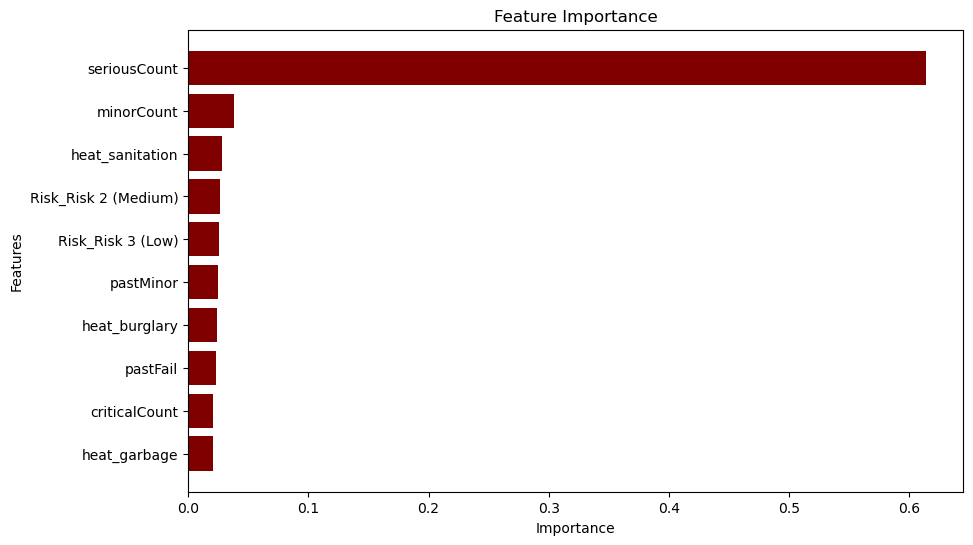

In [208]:
#a feature importance plot

# initialize an array to hold the feature importances
importances = np.zeros(X.shape[1])

# average the feature importances over the folds
for estimator in cv_results['estimator']:
    importances += estimator.feature_importances_
    
# divide by the number of folds
importances /= 5  

# create a DataFrame for visualization
feature_importance = pd.DataFrame({'feature': X.columns, 
                                   'importance': importances})

# sort the features by importance
feature_importance = feature_importance.sort_values('importance', ascending=False)

# take the top 10 features
feature_importance = feature_importance.head(10)

# plot the feature importances
plt.figure(figsize=(10, 6))

# horizontal bar plot
plt.barh(feature_importance['feature'], 
         feature_importance['importance'], 
         color='maroon', 
         align='center')

# labels
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')

plt.gca().invert_yaxis() 

answer ="The seriousCount is the most important feature and its degree of importance is much higher than the less. If I can find more data, I will add: the shelf life of their inventory, the share of perishable raw materials, and whether they have any food safety certifications"
print(answer)
plt.show()

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [158]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------
"""
# print the best hyperparameters and metrics
print(f"Best Hyperparameters: {best_params}")
print(f"\nAccuracy: {accuracy} \nRecall: {recall} \nPrecision: {precision} \nF1 Score: {f1}")
print(f"\nRuntime: {runtime} seconds")
"""
# I choose my AdaptiveBoosting to predict 
# make predictions on the test set
y_pred = final_model_adb.predict(X)

# make prediction on probability
y_pred_prob = final_model_adb.predict_proba(X)

# create dataframe to show the result
adb_outcome_prob = pd.DataFrame({'outcome': y_pred, 'probability of fail': y_pred_prob[:, 1]})
adb_outcome_prob

,outcome,probability of fail
0,0,0.011786
1,0,0.011786
2,1,0.728993
3,0,0.011786
4,1,0.728993
...,...,...
15306,0,0.011786
15307,0,0.011786
15308,1,0.728993
15309,0,0.011786


In [159]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------
adb_outcome_prob = adb_outcome_prob.sort_values(by='probability of fail', ascending=False)
adb_outcome_prob

,outcome,probability of fail
7655,1,0.728993
6925,1,0.728993
12759,1,0.728993
3463,1,0.728993
6920,1,0.728993
...,...,...
5849,0,0.011786
5850,0,0.011786
5851,0,0.011786
5856,0,0.011786


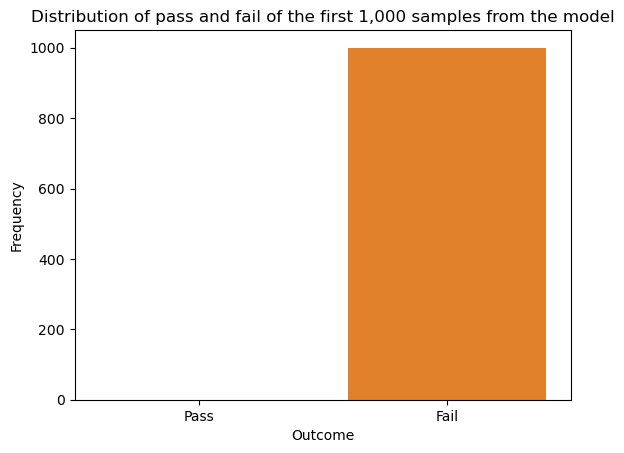

In [171]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------

# Convert int32 values to categories
adb_outcome_prob['outcome_cate'] = adb_outcome_prob['outcome'].astype('category')

# Map integer codes to category names
category_mapping = {1: 'Fail', 0: 'Pass'}
adb_outcome_prob['outcome_cate'] = adb_outcome_prob['outcome_cate'].map(category_mapping)

# Plot the distribution using sns.countplot
sns.countplot(x='outcome_cate', data=adb_outcome_prob[:1000])

# Add title and labels
plt.title("Distribution of pass and fail of the first 1,000 samples from the model")
plt.xlabel("Outcome")
plt.ylabel("Frequency")

# Show the plot
plt.show()


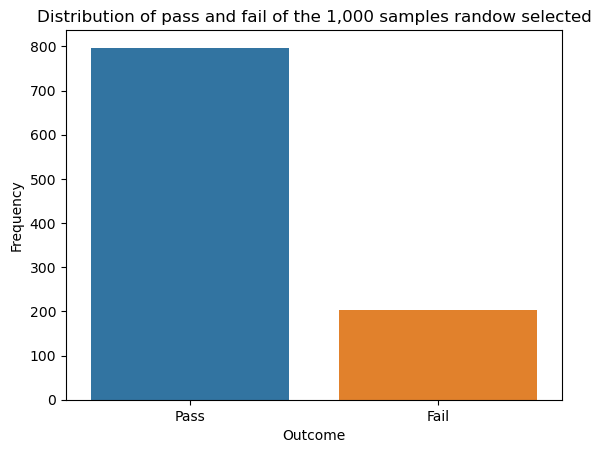

In [173]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------

# sample 1,000 observations randomly
random_audits = chicago_inspections_2011_to_2013['Results'].sample(n=1000, random_state=42)

#change pass with condition to pass
random_audits = random_audits.replace({'Pass w/ Conditions': 'Pass'})
random_audits = random_audits.to_frame()

# Plot the distribution using sns.countplot
sns.countplot(x='Results', data=random_audits)

# Add title and labels
plt.title("Distribution of pass and fail of the 1,000 samples randow selected")
plt.xlabel("Outcome")
plt.ylabel("Frequency")

# Show the plot
plt.show()

### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [200]:
# data processing
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

# drop datetime info, column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
# -----------



chicago_inspections_2014 = chicago_inspections_2014.dropna().drop(['Inspection_Date',
                                                                                   'Inspection_Type',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Facility_Type',
                                                                                   'WARD_PRECINCT',
                                                                                   'POLICE_DISTRICT',
                                                                                   'LICENSE_DESCRIPTION',
                                                                                   'APPLICATION_TYPE',
                                                                                   'ageAtInspection'],
                                                                                   axis = 1)

y = chicago_inspections_2014['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------
# Select columns to transform
columns_to_standardize = ['criticalCount', 'seriousCount', 'minorCount', 'pastFail', 'pastCritical', 'pastSerious', 'pastMinor',
                          'precipIntensity', 'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary', 'heat_garbage', 'heat_sanitation', 'timeSinceLast']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
chicago_inspections_2014[columns_to_standardize] = scaler.fit_transform(chicago_inspections_2014[columns_to_standardize])

# create feature dataset
X = chicago_inspections_2014.drop(columns = ['Results'])


# get dummies
X = pd.get_dummies(X)

# 'keep_list' is the list of variables you want to keep
keep_list = ['criticalCount', 'seriousCount', 'minorCount', 'pastFail', 'pastCritical',
 'pastSerious', 'pastMinor', 'timeSinceLast', 'firstRecord',
 'consumption_on_premises_incidental_activity', 'tobacco', 'package_goods',
 'outdoor_patio', 'public_place_of_amusement', 'limited_business_license',
 'childrens_services_facility_license', 'tavern',
 'regulated_business_license', 'filling_station', 'caterers_liquor_license',
 'mobile_food_license', 'precipIntensity', 'temperatureMax', 'windSpeed',
 'humidity', 'heat_burglary', 'heat_garbage', 'heat_sanitation',
 'criticalFound', 'Risk_Risk 1 (High)', 'Risk_Risk 2 (Medium)',
 'Risk_Risk 3 (Low)', 'Facility_Type_Clean_Other', 'Facility_Type_Clean_Restaurant']

# Create a list of variables to drop
variables_to_drop = [col for col in X.columns if col not in keep_list]

# Drop variables not in the 'keep_list'
X.drop(columns=variables_to_drop, inplace=True)



# set index
chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

# process features
X_test2014 = X

# process target 
y_test2014 = y
print(X_test2014.columns)
print(X_test2014.shape)

Index(['criticalCount', 'seriousCount', 'minorCount', 'pastFail',
       'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
       'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary',
       'heat_garbage', 'heat_sanitation', 'criticalFound',
       'Risk_Risk 1 (High)', 'Risk_Risk 2 (Medium)', 'Risk_Risk 3 (Low)',
       'Facility_Type_Clean_Other', 'Facility_Type_Clean_Restaurant'],
      dtype='object')
(3827, 34)


In [194]:
print(chicago_inspections_2014.columns)
print(chicago_inspections_2014.shape)

Index(['AKA_Name', 'License', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Latitude', 'Longitude', 'Location', 'Facility_Type_Clean',
       'criticalCount', 'seriousCount', 'minorCount', 'pastFail',
       'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast',
       'firstRecord', 'ID', 'LICENSE_ID', 'ACCOUNT_NUMBER', 'LEGAL_NAME',
       'DOING_BUSINESS_AS_NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP_CODE',
       'WARD', 'PRECINCT', 'LICENSE_CODE', 'BUSINESS_ACTIVITY_ID',
       'BUSINESS_ACTIVITY', 'LICENSE_NUMBER', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_patio', 'public_place_of_amusement',
       'limited_business_license', 'childrens_services_facility_license',
       'tavern', 'regulated_business_license', 'filling_station',
       'caterers_liquor_license', 'mobile_food_license', 'precipIntensity',
      

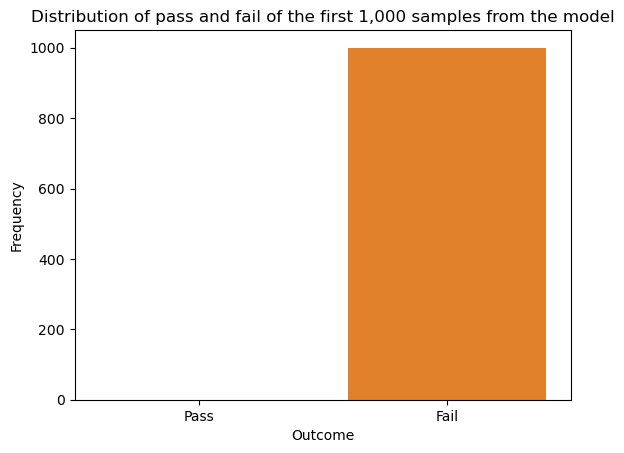

In [202]:
# predict and compare 
# -----------
# I choose my AdaptiveBoosting to predict 
# make predictions on the test set
y_pred = final_model_adb.predict(X_test2014)

# make prediction on probability
y_pred_prob = final_model_adb.predict_proba(X_test2014)

# create dataframe to show the result
adb_outcome_prob = pd.DataFrame({'outcome': y_pred, 'probability of fail': y_pred_prob[:, 1]})
adb_outcome_prob


adb_outcome_prob = adb_outcome_prob.sort_values(by='probability of fail', ascending=False)
adb_outcome_prob


# 3. Plot your distribution of pass/fail from the model
# -----------

# Convert int32 values to categories
adb_outcome_prob['outcome_cate'] = adb_outcome_prob['outcome'].astype('category')

# Map integer codes to category names
category_mapping = {1: 'Fail', 0: 'Pass'}
adb_outcome_prob['outcome_cate'] = adb_outcome_prob['outcome_cate'][:1000].map(category_mapping)

# Plot the distribution using sns.countplot
sns.countplot(x='outcome_cate', data=adb_outcome_prob)

# Add title and labels
plt.title("Distribution of pass and fail of the first 1,000 samples from the model")
plt.xlabel("Outcome")
plt.ylabel("Frequency")

# Show the plot
plt.show()


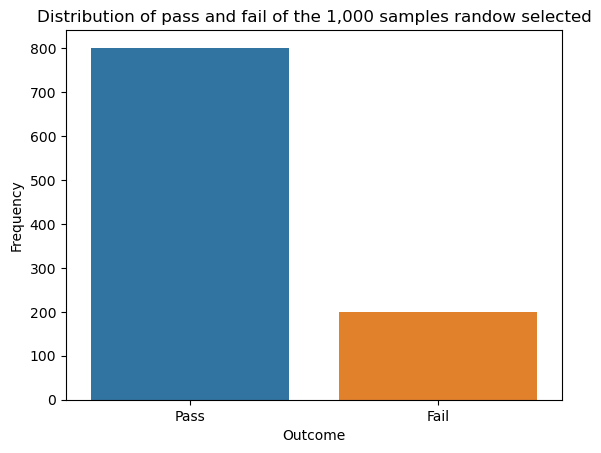

In [203]:

# 4. Simulate 1,000 random audits on the full chicago_2014.csv dataset 
# -----------

# sample 1,000 observations randomly
random_audits = chicago_inspections_2014['Results'].sample(n=1000, random_state=42)

#change pass with condition to pass
random_audits = random_audits.replace({'Pass w/ Conditions': 'Pass'})
random_audits = random_audits.to_frame()

# Plot the distribution using sns.countplot
sns.countplot(x='Results', data=random_audits)

# Add title and labels
plt.title("Distribution of pass and fail of the 1,000 samples randow selected")
plt.xlabel("Outcome")
plt.ylabel("Frequency")

# Show the plot
plt.show()

In [204]:
# evaluate
# -----------

# evaluate the final model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# record the end time/run time
end_time = time.time()
runtime = end_time - start_time

# print the best hyperparameters and metrics
print(f"Best Hyperparameters: {best_params}")
print(f"\nAccuracy: {accuracy} \nRecall: {recall} \nPrecision: {precision} \nF1 Score: {f1}")
print(f"\nRuntime: {runtime} seconds")

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 20, 'subsample': 0.9}

Accuracy: 0.8973085968121244 
Recall: 0.9272486772486772 
Precision: 0.6746871992300288 
F1 Score: 0.7810584958217269

Runtime: 8918.610936403275 seconds


## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


**Accuracy may not be sufficient in the context of social sciences and public policy. This project is a good example: here we want the model to recall, so that we can detect the food insecurity as many as possible. Or in the case of the model that predicts who is going to recommit the during the bailout, the precision should be giving more weight because false positives means you punish the innocent people harshly.**...

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

**First if those features is important for the food safety and the business improve themselves on those features, I think that is a good things and we should communicate what we want them to improve. Second, we can add a random element to our inspection, for example, even the business has low probabil;ity to false, we should randomly inspective them to makes them more alert on keeping the food safety standard.**...